### **Carga de librerías necesarias**


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd 
import sklearn as sk
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

from pandas.plotting import lag_plot

import re  

from shapely.geometry import Point, Polygon

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
from sklearn.cluster import KMeans
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score




### Cargamos la base "Datos prueba Fix.csv"

#### La base utilizada, se ha limpiado bajo los siguientes criterios: 

* Los datos nulos presentes en las variables: D1,...,D8, se han imputado con la parte entera inferior sobre la media de los datos
* Los datos nulos presentes en las variables: P1,...,P28, se han imputado con la mediana de la escala likert de la encuesta: 3
* Los datos fuera de rango y outliers presentes en las variables: P1,...,P28, se han imputado con la mediana de la escala likert de la encuesta: 3
* Se verifica que la imputación de datos de cada variable no superó el 1% del número de registros de la base (20 datos)

In [12]:
df = pd.read_csv("Datos prueba Fix.csv",delimiter=";")

In [13]:
df.head()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,1,2,1,14,2,1,3,3,4,5,...,4,3,2,4,4,3,3,4,3,3
1,1,2,1,7,2,3,4,3,3,2,...,4,3,3,2,3,5,3,4,3,3
2,1,6,1,7,2,4,1,2,2,3,...,5,3,3,5,4,2,4,4,5,2
3,1,5,1,7,1,3,3,3,2,2,...,5,4,4,4,2,3,3,4,2,3
4,1,2,1,3,2,5,3,1,3,3,...,5,3,3,4,3,4,4,3,3,3


### Revisamos la naturaleza de las varibales

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D1      1998 non-null   int64
 1   D2      1998 non-null   int64
 2   D3      1998 non-null   int64
 3   D4      1998 non-null   int64
 4   D5      1998 non-null   int64
 5   D6      1998 non-null   int64
 6   D7      1998 non-null   int64
 7   D8      1998 non-null   int64
 8   P1      1998 non-null   int64
 9   P2      1998 non-null   int64
 10  P3      1998 non-null   int64
 11  P4      1998 non-null   int64
 12  P5      1998 non-null   int64
 13  P6      1998 non-null   int64
 14  P7      1998 non-null   int64
 15  P8      1998 non-null   int64
 16  P9      1998 non-null   int64
 17  P10     1998 non-null   int64
 18  P11     1998 non-null   int64
 19  P12     1998 non-null   int64
 20  P13     1998 non-null   int64
 21  P14     1998 non-null   int64
 22  P15     1998 non-null   int64
 23  P16     1998 

In [15]:
df.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,1.133634,3.377377,1.055055,7.508509,1.478979,2.316817,2.572072,2.579580,2.425926,2.518018,...,4.347347,3.832332,3.398899,3.733734,3.570070,3.661161,3.622623,3.777778,3.610110,3.453453
std,0.340343,1.361069,0.228145,2.386046,0.499683,1.334878,1.009003,0.982278,0.541949,0.553068,...,0.718502,0.874393,0.985391,0.854558,0.974304,0.898339,0.912128,0.896031,0.932707,1.001544
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,7.000000,2.000000,16.000000,2.000000,6.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
df.isnull().sum(axis = 0)

D1     0
D2     0
D3     0
D4     0
D5     0
D6     0
D7     0
D8     0
P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
P12    0
P13    0
P14    0
P15    0
P16    0
P17    0
P18    0
P19    0
P20    0
P21    0
P22    0
P23    0
P24    0
P25    0
P26    0
P27    0
P28    0
dtype: int64

### Eliminamos duplicados en caso de existir:

In [17]:
df=df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [18]:
df

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,1,2,1,14,2,1,3,3,4,5,...,4,3,2,4,4,3,3,4,3,3
1,1,2,1,7,2,3,4,3,3,2,...,4,3,3,2,3,5,3,4,3,3
2,1,6,1,7,2,4,1,2,2,3,...,5,3,3,5,4,2,4,4,5,2
3,1,5,1,7,1,3,3,3,2,2,...,5,4,4,4,2,3,3,4,2,3
4,1,2,1,3,2,5,3,1,3,3,...,5,3,3,4,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1,4,1,5,1,3,3,2,3,2,...,4,4,4,4,4,5,4,4,5,4
1994,1,2,1,7,2,1,3,3,3,3,...,4,2,3,2,3,1,2,1,2,3
1995,2,2,1,14,1,1,3,3,3,3,...,5,4,4,4,4,3,4,3,2,2
1996,1,3,1,7,1,3,3,4,2,2,...,5,4,4,4,3,4,4,5,5,4


### Realizamos gráficas exploratorias iniciales

In [33]:
fig = px.histogram(df, x="D2", color="D1", title="Distribución de Edad por Género")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

#### Se concluye que hay una mayor proporción de respuestas para la categoría de edad **1**, lo cual indica un fuerte sesgo de género en la encuesta, podría corresponder al género femenino, dependiendo si el rubro de la tienda 

In [34]:
fig = px.histogram(df, x="D2", color="D6",title="Distribución de Edad por Categoría de Ingreso")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

#### Se conluye que hay una mayor proporción de clientes encuestados para las categorias de ingreso **1, 2 y 3**, podría corresponder a población de clientes con mayor ingreso

In [38]:
fig = px.histogram(df, x="D2", color="D7", title="Distribución de Edad por Categoría Frecuencia de Compra")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [37]:
fig = px.histogram(df, x="D2", color="D8", title="Distribución de Edad por Categoría Horario Favorito")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

#### Se concluye que el horario favorito de compra, corresponde al de la categoría horaria **3**

In [42]:
fig = px.histogram(df, x="D2", color="D5", title="Distribución de Edad por Sostendor Económico")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

#### Se concluye que la moda de la categoría edad para el sostenedor económico **2** es **2**, mientras que la moda para la categoría de sostenedor económico **1** es 4. Asumiendo una distribución creciente y ordenada para las categorías de edad, podríamos afirmar que la categoría de sostenedor 2 corresponde a los padres, mientras que la categoría 1 a individuo encuestado.

In [39]:
fig = px.histogram(df, x="P18", title="Distribución Satisfacción Evaluación")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [41]:
fig = px.histogram(df, x="P19", title="Distribución Recomendación Evaluación")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

#### Se concluye que en general, hay un alto nivel de satisfacción y recomendación de la tienda, de parte de los clientes encuestados, se espera que ambas variables estén altamente correlacionadas.

In [67]:
cols =['P1','P2','P3','P4','P4','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26','P27','P28']
fig = go.Figure()
for col in cols:
    fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
fig.show()

#### Al observar los gráficos boxplot, de las variables asociadas al cuestionario (P1,...,P28), se concluye que las siguientes preguntas de la encuesta, tienen una tendencia positiva: P9, ..., P28, con una media entre 3,5 y 4. Y, por otro lado, q las preguntas P1, ...P8, tienen una tendencia a la baja, cuyos promedios están bajo la mediana esperada, situados en 2,5.  

#### Sin embargo, a pesar de los resultados mayoritariamente positivos, estos pueden tener sesgo de contrucción, el cual se suma al sesgo de género previamente detectado, esto se deduce del hecho que la totalidad de preguntas fueron redactadas en con un lenguaje positivo y con juicios de valor, en general, este tipo de redacción se trata de evitar en todo tipo de instrumento de evaluación.

#### Debido a lo anterior, resulta imposible detectar u observar discriminación alguna en las preguntas del instrumento, dicho de otro modo, la mayoría de las variables son susceptibles de ser consideradas como variables explicativas para la **satisfacción** y **recomendación** de la tienda, aún cuando podríamos descartar a priori las variables P1, ..., P8, debido a que sus resultados junto con resultado de la satisfacción recomendación, no son consistentes con los enunciados de dichas preguntas, pero esto no es concluyente. SEsto nuevamente nos hace pensar que hay error de contrucción y/o aplicación. Por este motivo procedemos a utilizar una **matriz de correlación** para detectar variables significativas y correlacionadas positivamente, para la construcción de un modelo de regresión, con respecto de las las variables objetivo:


* P18: **Satisfacción evaluación**
* P19: **Recomendación evaluacion**


### Estandarizamos las variables, con el objetivo de comprender las posibles correlaciones existentes.

#### La estandarización de variables, evita introducir sesgos a partir de la naturaleza de los registros o escalas de los datos.

In [43]:
scaler=StandardScaler()
df_sc=pd.DataFrame(scaler.fit_transform(df), index=df.index,columns=df.columns)

In [70]:
#dataframe con los datos estandarizados
df_sc

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,-0.392742,-1.012236,-0.241377,2.721287,1.042964,-0.986716,0.424216,0.428113,2.905194,4.488783,...,-0.483554,-0.952136,-1.419994,0.311662,0.441379,-0.736166,-0.682776,0.248069,-0.654292,-0.452868
1,-0.392742,-1.012236,-0.241377,-0.213171,1.042964,0.511922,1.415541,0.428113,1.059541,-0.936860,...,-0.483554,-0.952136,-0.404914,-2.029317,-0.585251,1.490722,-0.682776,0.248069,-0.654292,-0.452868
2,-0.392742,1.927367,-0.241377,-0.213171,1.042964,1.261242,-1.558434,-0.590184,-0.786111,0.871687,...,0.908580,-0.952136,-0.404914,1.482151,0.441379,-1.849610,0.413837,0.248069,1.490540,-1.451576
3,-0.392742,1.192467,-0.241377,-0.213171,-0.958806,0.511922,0.424216,0.428113,-0.786111,-0.936860,...,0.908580,0.191801,0.610166,0.311662,-1.611881,-0.736166,-0.682776,0.248069,-1.726708,-0.452868
4,-0.392742,-1.012236,-0.241377,-1.890004,1.042964,2.010561,0.424216,-1.608480,1.059541,0.871687,...,0.908580,-0.952136,-0.404914,0.311662,-0.585251,0.377278,0.413837,-0.868243,-0.654292,-0.452868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-0.392742,0.457566,-0.241377,-1.051587,-0.958806,0.511922,0.424216,-0.590184,1.059541,-0.936860,...,-0.483554,0.191801,0.610166,0.311662,0.441379,1.490722,0.413837,0.248069,1.490540,0.545841
1994,-0.392742,-1.012236,-0.241377,-0.213171,1.042964,-0.986716,0.424216,0.428113,1.059541,0.871687,...,-0.483554,-2.096073,-0.404914,-2.029317,-0.585251,-2.963053,-1.779388,-3.100868,-1.726708,-0.452868
1995,2.546202,-1.012236,-0.241377,2.721287,-0.958806,-0.986716,0.424216,0.428113,1.059541,0.871687,...,0.908580,0.191801,0.610166,0.311662,0.441379,-0.736166,0.413837,-0.868243,-1.726708,-1.451576
1996,-0.392742,-0.277335,-0.241377,-0.213171,-0.958806,0.511922,0.424216,1.446409,-0.786111,-0.936860,...,0.908580,0.191801,0.610166,0.311662,-0.585251,0.377278,0.413837,1.364382,1.490540,0.545841


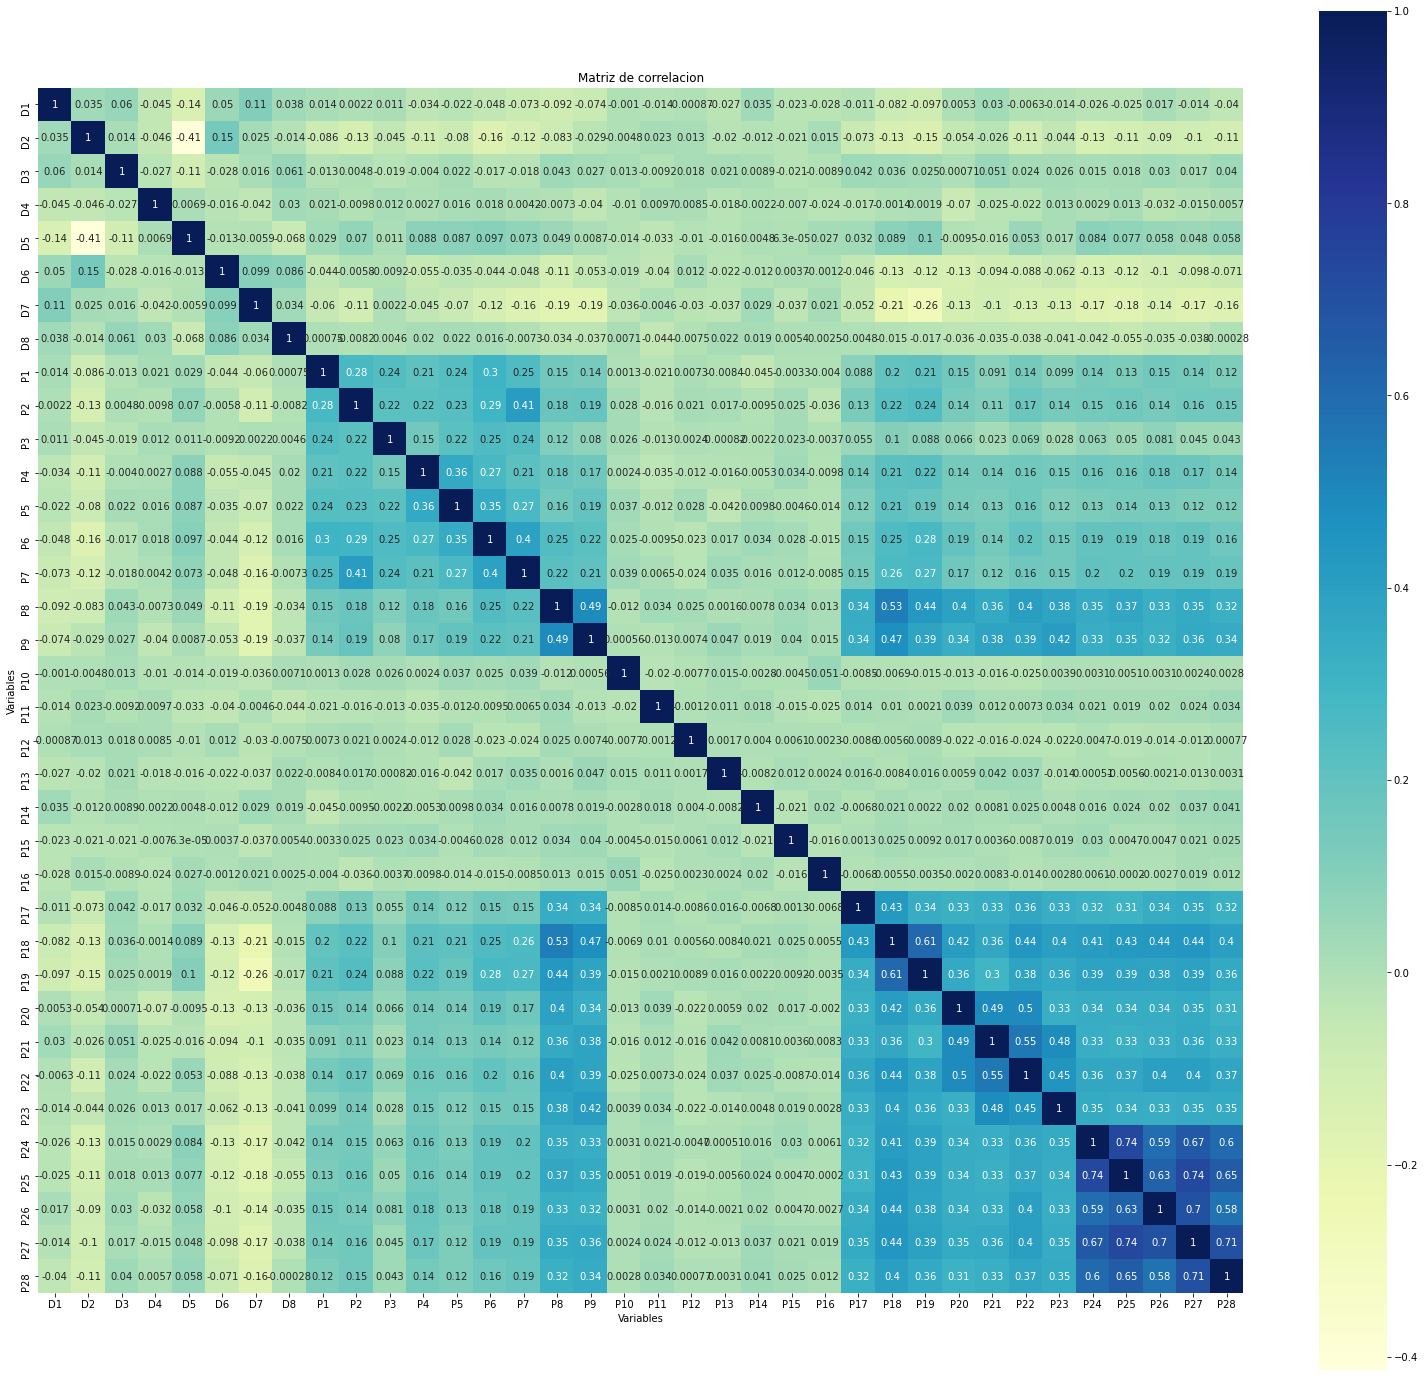

In [68]:
f, ax = plt.subplots(figsize=(27, 25))
cor = df.corr(method='kendall', min_periods=1)
sns.heatmap(cor,square=True, annot=True, cmap="YlGnBu")
plt.title("Matriz de correlacion")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

#### Observamos claramente agrupaciones con correlaciones positivas y significativas y/o altamente significativas (p-value>0,1 y/o p-value>0,5), esta situación ocurre en los siguientes grupos de variables:

* P1, P2, ..., P9
* P17, P18, ..., P28

#### Por tanto no consideraremos en nuestro modelo predictivo, las variables P10, P11, P12, P13, P14, P15, P16

#### Con respecto de las variables D1, D2, ... D8, consideramos las variables D3 y D5, las cuales presentan una correlación positova con P18 y P19

In [73]:
#variables predictivas
X= df.drop(['D1','D2','D4','D6','D7','D8','P10','P11','P12','P13','P14','P15','P16', 'P18','P19'],axis=1)

In [74]:
X

,D3,D5,P1,P2,P3,P4,P5,P6,P7,P8,...,P17,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,1,2,4,5,4,2,5,3,4,5,...,3,3,2,4,4,3,3,4,3,3
1,1,2,3,2,3,2,2,3,2,3,...,2,3,3,2,3,5,3,4,3,3
2,1,2,2,3,3,2,3,2,3,4,...,1,3,3,5,4,2,4,4,5,2
3,1,1,2,2,2,3,3,3,3,5,...,4,4,4,4,2,3,3,4,2,3
4,1,2,3,3,2,3,3,3,2,3,...,4,3,3,4,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1,1,3,2,2,3,3,3,2,4,...,5,4,4,4,4,5,4,4,5,4
1994,1,2,3,3,2,3,2,2,3,3,...,1,2,3,2,3,1,2,1,2,3
1995,1,1,3,3,3,3,3,3,2,3,...,2,4,4,4,4,3,4,3,2,2
1996,1,1,2,2,2,3,2,3,2,4,...,4,4,4,4,3,4,4,5,5,4


In [75]:
#variables objetivo
y1=df[['P18']]
y2=df[['P19']]

In [76]:
y1

,P18
0,5
1,4
2,4
3,5
4,4
...,...
1993,4
1994,4
1995,4
1996,4


In [77]:
y2

,P19
0,4
1,4
2,5
3,5
4,5
...,...
1993,4
1994,4
1995,5
1996,5


In [91]:
#recodificamos variables objetivo
lab_enc = preprocessing.LabelEncoder()
y1 = lab_enc.fit_transform(y1)
y2 = lab_enc.fit_transform(y2)

/Users/igodel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [92]:
#construimos conjuntos de datos para entrenamiento y evaluación con una proporción 70-30:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=42)

In [93]:
y1_test

array([2, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3,
       3, 2, 3, 3, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 4, 3,
       3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 3, 2, 4,
       4, 3, 4, 3, 3, 3, 4, 2, 4, 3, 3, 1, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3,
       3, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 4, 1, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4,
       3, 3, 4, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4,
       3, 3, 4, 3, 3, 4, 3, 3, 1, 2, 3, 4, 3, 4, 0, 3, 4, 2, 3, 3, 2, 3,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 2, 4, 3,
       2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 2, 2, 4, 2, 2, 4, 4, 3, 3, 4, 3,
       3, 4, 3, 3, 2, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 2, 4, 3, 2, 4, 3,
       3, 3, 2, 2, 2, 4, 3, 4, 3, 3, 4, 4, 4, 3, 2,

In [98]:
# Creamos el primero Modelo
model1 = LogisticRegression(random_state=0,solver='liblinear')
# Ajustamos al conjunto de entrenamiento
model1.fit(X1_train, y1_train)
# Realizamos las Predicciones
y_pred1 = model1.predict(X1_test)

In [113]:
#Evaluación General del modelo
accuracy=metrics.accuracy_score(y1_test, y_pred1)
print('Accuracy:',accuracy)

report=metrics.classification_report(y1_test, y_pred1)
print(report)

Accuracy: 0.755
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.57      0.08      0.13        53
           3       0.74      0.93      0.83       368
           4       0.80      0.64      0.71       169

    accuracy                           0.76       600
   macro avg       0.42      0.33      0.33       600
weighted avg       0.73      0.76      0.72       600



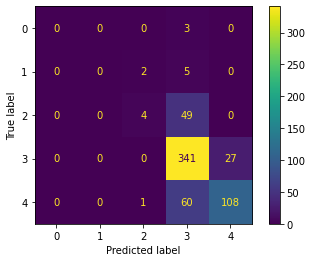

In [108]:
plot_confusion_matrix(model1, X1_test, y1_test)

In [109]:
# Creamos el primero Modelo
model2 = LogisticRegression(random_state=0,solver='liblinear')
# Ajustamos al conjunto de entrenamiento
model2.fit(X2_train, y2_train)
# Realizamos las Predicciones
y_pred2 = model2.predict(X2_test)


In [112]:
#Evaluación General del modelo
accuracy=metrics.accuracy_score(y2_test, y_pred2)
print('Accuracy:',accuracy)

report=metrics.classification_report(y2_test, y_pred2)
print(report)

Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        27
           3       0.65      0.76      0.70       277
           4       0.74      0.73      0.74       281

    accuracy                           0.69       600
   macro avg       0.28      0.30      0.29       600
weighted avg       0.65      0.69      0.67       600



/Users/igodel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



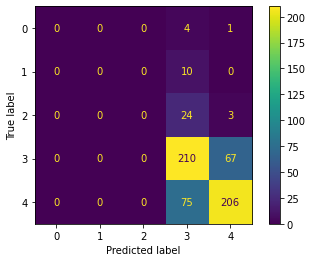

In [111]:
plot_confusion_matrix(model2, X2_test, y2_test)

### Conclusión:

#### En términos generales, los resultados obtenidos por ambas regresiones son favorables, ambas presentan un alto accuracy y alto f1-score, lo que se traduce en una alta predictibilidad para las clases 4 y 5, correspondiente a los baremos "De acuerdo" y "Muy de acuerdo", en las variables correspondientes a la satisfacción (P18) y recomendación (P19). En particular el desempeño del primer modelo es superior, por tanto la regresión logística propuesta se ajusta mejor para la variables satisfacción (P18), presentando un f1-score del **83%** y **71%**, para las categorías 3 y 4 (asociadas a los baremos "De acuerdo" y "Muy de acuerdo" ), y un accuracy agredado de un **76%**.

#### A partir de lo anterior, se puede afirmar que las variables seleccionadas en la regresión, explican la satisfacción del cliente. Por otra parte, se sugieren las siguientes recomendaciones:

   1. Revisar el constructo gerenal de la encuesta, dado que presenta oportunidades de mejora en la redacción de los ítems 
   2. Revisar la aplciación y consistencia de las respuestas, dado que hay respuestas en ciertas pregutnas, que son inconsistentes con los resultados generales
   3. Definir una metodología de aplicación que elimine sesgos de selección, muy evidentes en el instrumento aplicado
   4. Establecer preguntas que posean mayor discriminación para las variables objetivos, con el fin de poder concluir con mayor certeza la satisfacción y posible recomendación del cliente
 
En consecuencia, más allá del modelo propuesto se debe redefinir el instrumento, dado que los resultados obtenidos poseen sesgo de selección, aplicación y construcción, sin cosiderar el hecho que la regresión logísitca puede sustituirse por otros modelos de aprendizaje supervisado para variables categóricas, que gozan de mejor rendimiento y exctitud, y la empresa requiere información más fidedigna a la hora de tomar desiciones comerciales.

